In [1]:
import numpy as np
from promold_box import FiberPostProcessing
import matplotlib.pyplot as plt
%matplotlib inline

rho = 1.5282
rho1 = 2.54
mf = 30

# Center-gated disk problem

Problem characteristics
- $H=0.69$, $r_\mathrm{max}=57$, actual maxium radius (90%) $r_\mathrm{out}=51.53$, $r_\mathrm{in}=2.97$, $r_\mathrm{out}-r_\mathrm{in}=48.56$
- Valox 420, PBT 30%, $\eta=350\,\mathrm{Pa}\cdot\mathrm{s}$ at 260°
- 90° mold, 260° melt (160° reported by Vélez-García and Mazahir but a mistake I think), 1 s of injection time, 11.8 $\mathrm{cm}^3/\mathrm{s}$
- Measurement points: A 10%, B 40%, C 90% of $r_\mathrm{out}-r_\mathrm{in}=48.56$
- Measurement planes: 0.75H (0.5175), 0.42H (0.2898), 0.08H (0.0552)

This notebook presents some preliminary numerical sensitivity analyses performed under Moldflow Insight TP 2019.

## Computational time

- 1.2 million elements, 16 layers of tetras, 4% time-step
- Intel Xeon @ 3.6 GHz, 16 GB of RAM, 4 cores, automatic parallellization
- Uncoupled: 1 hr 24 min
- Coupled: 1 hr 28 min

## Physical imperfections-induced angular variability

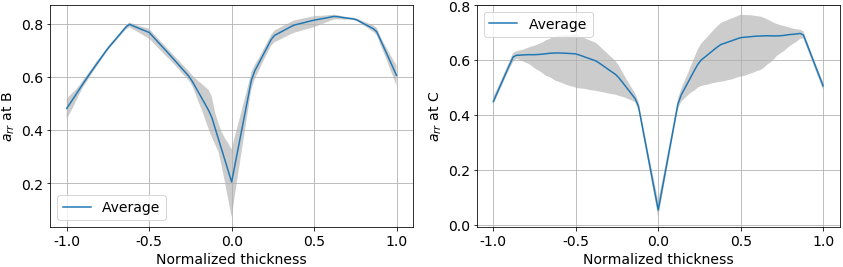

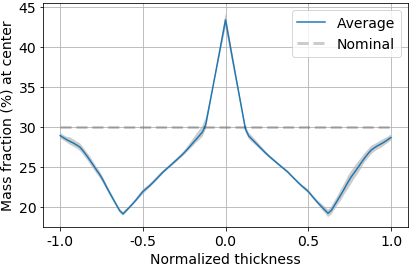

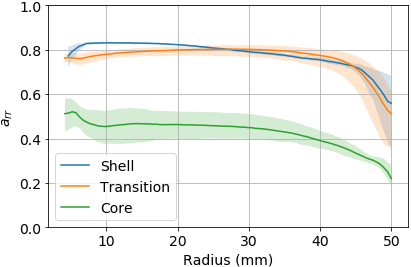

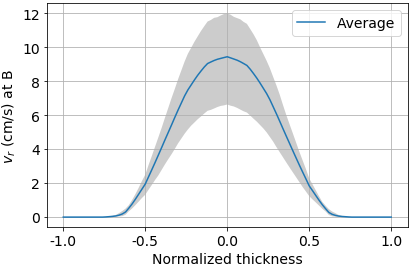

In [3]:
pp = FiberPostProcessing()
pp.use_csv_angular_averaging = True
pp.read_sim("project/data/rsc_default", label="Average")
pp.plot_aij("rr", ["B", "C"])
pp.plot_mf(["center"], rho=rho, rho1=rho1, mf=mf)
pp.plot_arr_on_z(["shell", "transition", "core"])
pp.plot_v(["B"])

## Mesh

16 layers are ok.

### Uncoupled case

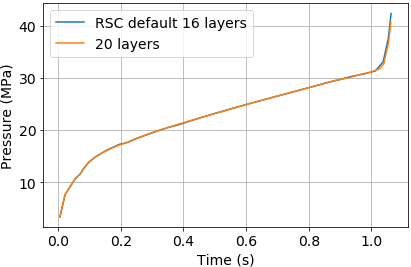

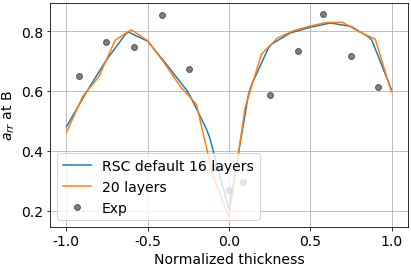

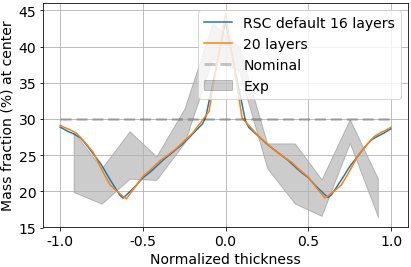

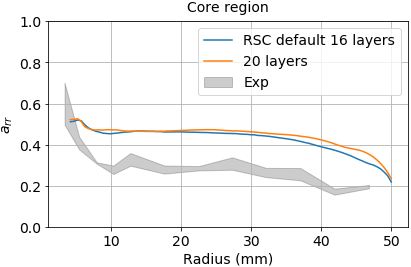

In [8]:
pp = FiberPostProcessing()
pp.use_csv_angular_averaging = True
pp.read_exp("project/exp")
pp.read_sim("project/data/rsc_default", "RSC default 16 layers")
pp.read_sim("project/data/rsc_default_refined", "20 layers")

pp.plot_pressure()
pp.plot_aij("rr", ["B"])
pp.plot_mf(["center"], rho=rho, rho1=rho1, mf=mf)
pp.plot_arr_on_z("core", title="Core region")

## Time-step

4% is ok.

### Uncoupled case

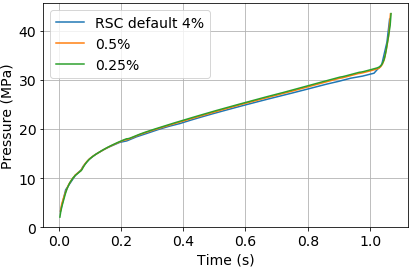

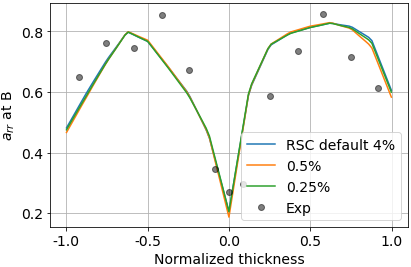

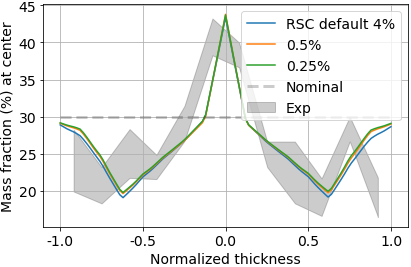

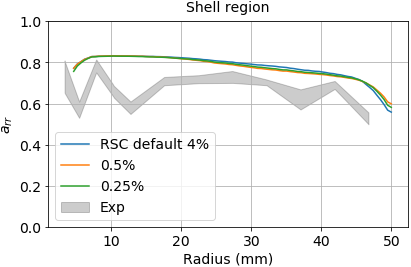

In [5]:
pp = FiberPostProcessing()
pp.use_csv_angular_averaging = True
pp.read_exp("project/exp")
pp.read_sim("project/data/rsc_default", "RSC default 4%")
pp.read_sim("project/data/rsc_default_05p", "0.5%")
pp.read_sim("project/data/rsc_default_025p", "0.25%")

pp.plot_pressure()
pp.plot_aij("rr", ["B"])
pp.plot_mf(["center"], rho=rho, rho1=rho1, mf=mf)
pp.plot_arr_on_z("shell", title="Shell region")

### Coupled case

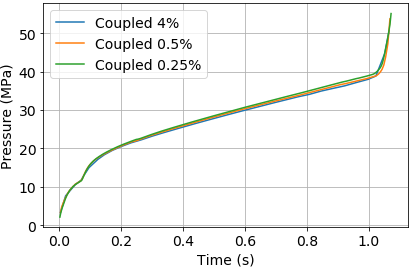

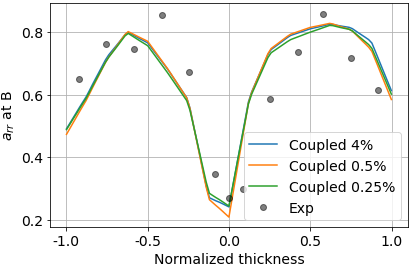

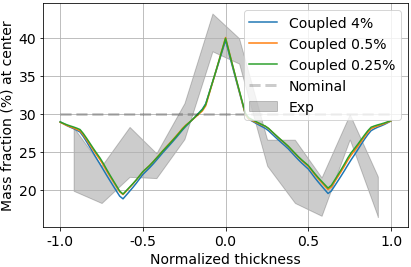

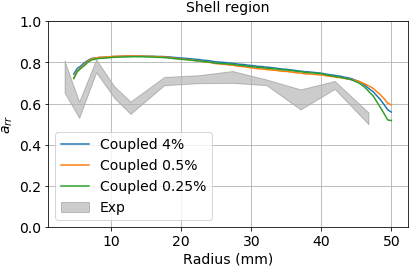

In [6]:
pp = FiberPostProcessing()
pp.use_csv_angular_averaging = True
pp.read_exp("project/exp")
pp.read_sim("coupled/data/rsc_default", "Coupled 4%")
pp.read_sim("coupled/data/rsc_default_05p", "Coupled 0.5%")
pp.read_sim("coupled/data/rsc_default_025p", "Coupled 0.25%")

pp.plot_pressure()
pp.plot_aij("rr", ["B"])
pp.plot_mf(["center"], rho=rho, rho1=rho1, mf=mf)
pp.plot_arr_on_z("shell", title="Shell region")

## Injection conditions

Default option (random at the gate) is ok.

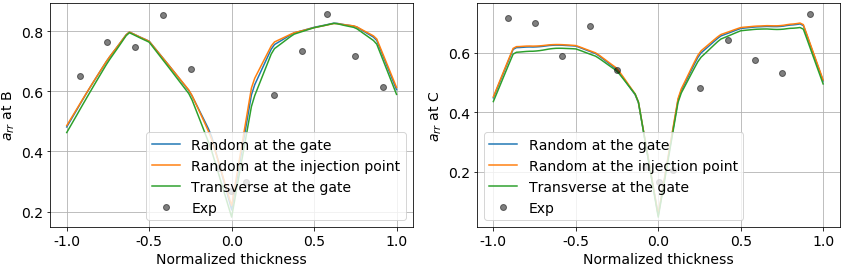

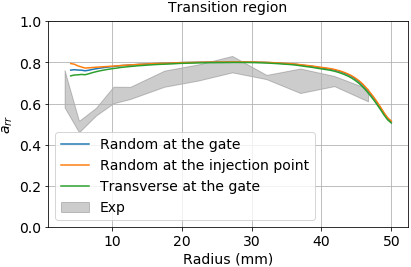

In [10]:
pp = FiberPostProcessing()
pp.use_csv_angular_averaging = True
pp.read_exp("project/exp")
pp.read_sim("project/data/rsc_default", "Random at the gate")
pp.read_sim("project/data/rsc_default_inlet", "Random at the injection point")
pp.read_sim("project/data/rsc_default_inlet_transverse", "Transverse at the gate")

pp.plot_aij("rr", ["B", "C"])
pp.plot_arr_on_z("transition", title="Transition region")